In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
def plt_show(image, title=""):
    if np.ndim(image) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.title(title)
    plt.imshow(image, cmap='Greys_r')
    plt.show()

## External Window

In [2]:
webcam = cv2.VideoCapture(0)
while True:
    _, frame = webcam.read()
    cv2.imshow("face", frame)
    
    # 27 for ESC key
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    
webcam.release()
cv2.destroyAllWindows()

## In Notebook
__Note__: for KeyboardInterrupt press i 2 times

In [3]:
webcam = cv2.VideoCapture(0)
from IPython.display import clear_output
try:
    while True:
        _, frame = webcam.read()
        plt_show(frame)
        clear_output(wait=True)
except KeyboardInterrupt:
    print("Video Close")
    

Video Close


In [4]:
webcam.release()

## Read and write video
### 1.  External window

In [38]:
# read video
webcam = cv2.VideoCapture('/home/rohitkumar/Downloads/Black.Panther.2018.720p.New.HDTS.X264.MP3.128kbps.LLG/Black.Panther.2018.720p.New.HDTS.X264.MP3.128kbps.LLG.mp4')

while webcam.isOpened:
    _, frame = webcam.read()
    cv2.imshow("Video", frame)
    
    if cv2.waitKey(20) & 0xff == 27:
        break
        
webcam.release()
cv2.destroyAllWindows()


### 2.  In Notebook

In [42]:
# read video
webcam = cv2.VideoCapture('/home/rohitkumar/Downloads/Black.Panther.2018.720p.New.HDTS.X264.MP3.128kbps.LLG/Black.Panther.2018.720p.New.HDTS.X264.MP3.128kbps.LLG.mp4')ii
try:
    while webcam.isOpened:
        ret, frame = webcam.read()
#         frame = frame[]
        plt_show(frame)
        clear_output(wait=True)
except KeyboardInterrupt:
    print("Video Close")

Video Close


## Record Video
### 1. External Window

__cv2.VideoWriter_fourcc(*'XVID')__<br>
__cv2.VideoWriter(path, fourcc, fps, pixel_size)__

In [45]:
webcam = cv2.VideoCapture(0)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
video = cv2.VideoWriter('video.avi', fourcc, 20, (640, 480))
while True:
    _, frame = webcam.read()
    cv2.imshow("face", frame)
    video.write(frame)
    
    # 27 for ESC key
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    
webcam.release()
video.release()
cv2.destroyAllWindows()

### 2. In Notebook

Video Close


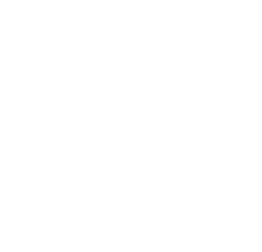

In [5]:
webcam = cv2.VideoCapture(0)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
video = cv2.VideoWriter('video.avi', fourcc, 30, (640, 480))
from IPython.display import clear_output
try:
    while True:
        _, frame = webcam.read()
        video.write(frame)
        
        plt_show(frame)
        clear_output(wait=True)
except KeyboardInterrupt:
    print("Video Close")

webcam.release()
video.release()
cv2.destroyAllWindows()

### View through circle

In [14]:
webcam = cv2.VideoCapture(0)
while True:
    _, frame = webcam.read()
    mask = np.zeros_like(frame)
    height, width,_ = np.shape(frame)
   
    cv2.circle(mask, (int(height/2), int(width/2)), 200, (255, 255, 255), -1)
    
    frame = np.bitwise_and(mask, frame)
    cv2.imshow("face", frame)
    
    # 27 for ESC key
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    
webcam.release()
cv2.destroyAllWindows()

## Face Detection

In [16]:
webcam = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier('/media/rohitkumar/Rohit-Sonu/python3/projects/Face_Recognition/haarcascade_frontalface_default.xml')

while True:
    _, frame = webcam.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for x,y,w,h in face:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
    cv2.imshow("Face", frame)
    
    if cv2.waitKey(20) & 0xff == 27:
        break;
webcam.release()
cv2.destroyAllWindows()

## Helpful classes for detection

In [4]:
class FaceDetection(object):
    def __init__(self, xml_path):
        self.face_cascade = cv2.CascadeClassifier(xml_path)
        
    def detect(self, frame):
        gray = frame
        if np.ndim(frame) == 3:
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        face = self.face_cascade.detectMultiScale(gray, 1.3, 5)
        
#         for x,y,w,h in face:
#             cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
        return face

In [5]:
class VideoCamera(object):
    def __init__(self, index=0):
        self.webcam = cv2.VideoCapture(index)
        self.index = index
        print(self.webcam.isOpened())
        
    def get_frame(self, gray=False):
        _, frame = self.webcam.read()
        if gray:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        return frame
    
    def delete(self):
        self.webcam.release()
        cv2.destroyAllWindows()
        print(self.webcam.isOpened())

### use of these classes

In [5]:
webcam = VideoCamera(0)
detector = FaceDetection('/media/rohitkumar/Rohit-Sonu/python3/projects/Face_Recognition/haarcascade_frontalface_default.xml')

# try:
while True:
    frame = webcam.get_frame(False)
    face = detector.detect(frame)

    for x, y, w, h in face:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
    cv2.imshow("Face", frame)

    if cv2.waitKey(20) & 0xff == 27:
        break

webcam.delete()
        

True
False


## Image Normalization
-  Cut the face
-  Normalized pixel intensity
-  Resize face image
-  Align face image

### 1. Cut the faces

In [6]:
def cut_faces(image, face_cord):
    faces = []
    
    for x, y, w, h in face_cord:
        w_rm = int(0.2 * w/2)
#         print(w_rm)
        faces.append(image[y:y+h, x+w_rm:x+w-w_rm])
    
    return faces

In [7]:
webcam = VideoCamera(0)
detector = FaceDetection('/media/rohitkumar/Rohit-Sonu/python3/projects/Face_Recognition/haarcascade_frontalface_default.xml')
from IPython.display import clear_output
try:
    while True:
        frame = webcam.get_frame()
        face_cord = detector.detect(frame)
        if len(face_cord):
            cut = cut_faces(frame, face_cord)
#             print(cut[0])
            plt_show(cut[0])
            clear_output(wait=True)
except KeyboardInterrupt:
    print("Video Close")
    webcam.delete()

Video Close
False


### 2. Normalized pixel intensity
1. convert image from rgb to gray
2. contrast enhanced

In [8]:
def normalized(images):
    images_norm = []
    
    for image in images:
        if np.ndim(image) == 3:
            images_norm.append(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
        else:
            # contrast pixel intensity
            images_norm.append(cv2.equalizeHist(image))
    return images_norm

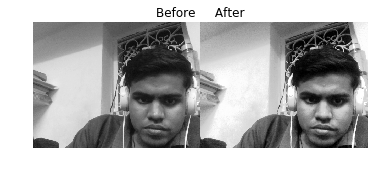

In [16]:
img1 = cv2.imread('/media/rohitkumar/Rohit-Sonu/python3/projects/face.png', 0)
img2 = cv2.imread('/media/rohitkumar/Rohit-Sonu/python3/projects/face.png', 0)
img2 = cv2.equalizeHist(img2)
plt_show(np.hstack((img1, img2)), "Before     After")

#### Cut and normalized face

In [9]:
webcam = VideoCamera(0)
detector = FaceDetection('/media/rohitkumar/Rohit-Sonu/python3/projects/Face_Recognition/haarcascade_frontalface_default.xml')
from IPython.display import clear_output
try:
    while True:
        frame = webcam.get_frame()
        face_cord = detector.detect(frame)
        if len(face_cord):
            cut = cut_faces(frame, face_cord)
            norm_frame = normalized(cut)
#             print(cut[0])
            plt_show(norm_frame[0])
            clear_output(wait=True)
except KeyboardInterrupt:
    print("Video Close")
    webcam.delete()

Video Close
False


### 3. Resize

In [10]:
def resize(frames, size=(100, 100)):
    image_resize = []
    
    for frame in frames:
        if frame.shape < size:
            img = cv2.resize(frame, size, interpolation=cv2.INTER_AREA)
        else:
            img = cv2.resize(frame, size, interpolation=cv2.INTER_CUBIC)
        image_resize.append(img)
    
    return image_resize

#### Cut, normalized and resize face

In [21]:
webcam = VideoCamera(0)
detector = FaceDetection('/media/rohitkumar/Rohit-Sonu/python3/projects/Face_Recognition/haarcascade_frontalface_default.xml')
from IPython.display import clear_output
try:
    while True:
        frame = webcam.get_frame()
        face_cord = detector.detect(frame)
        if len(face_cord):
            cut = cut_faces(frame, face_cord)
            norm_frame = normalized(cut)
            resize_frame = resize(norm_frame)
# #             print(cut[0])
            plt_show(resize_frame[0])
            clear_output(wait=True)
except KeyboardInterrupt:
    print("Video Close")
    webcam.delete()

Video Close
False


### 4. Align Image

In [ ]:
## pending

In [11]:
def normalized_images(image, face):
    cut = cut_faces(image, face)
    norm = normalized(cut)
    res = resize(norm)
    return res;

def drawRect(image, face):
    for x, y, w, h in face:
        w_rmv = int(0.2 * w/2)
        cv2.rectangle(image, (x+w_rmv, y), (x+w-w_rmv, y+h), (0, 0, 0, 255), 2)

### create dataset of 30 face each person

In [48]:
from IPython.display import clear_output

cwd = '/media/rohitkumar/Rohit-Sonu/python3/projects/Face_Recognition/cv2_Basic _function'
folder = cwd+'/people/'+ input('Person name: ').lower()

webcam = VideoCamera(0)
detector = FaceDetection('/media/rohitkumar/Rohit-Sonu/python3/projects/Face_Recognition/haarcascade_frontalface_default.xml')
       

if not os.path.exists(folder):
    os.mkdir(folder)
    counter = 0
    timer = 0
    
     
    while counter<30:
    
        frame = webcam.get_frame()
        face_coord = detector.detect(frame)
        
        if len(face_coord) and timer%700 == 50:
            norm_frame = normalized_images(frame, face_coord)
            cv2.imwrite(folder+'/'+str(counter)+'.jpg', norm_frame[0])
            plt_show(norm_frame[0])
            clear_output(wait=True)
            counter += 1
        drawRect(frame, face_coord)
        cv2.imshow("Face", frame)
        
        cv2.waitKey(50)
        timer += 50
    webcam.delete()
else:
    print('user already exist')

False


# Training the model

_recognizer.train(image, label)_

-  images: list of numpy arrays
-  labels: numpy array with the label corresponding to image

In [28]:
def collect_dataset():
    images = []
    labels = []
    label_dic = {}
    
    persons = [person for person in os.listdir('people/')]
    
    for idx, person in enumerate(persons):
        label_dic[idx] = person
        
        for img in os.listdir('people/'+person):
            images.append(cv2.imread('people/'+person+'/'+img, 0))
            labels.append(idx)
            
    return (images, np.array(labels), label_dic)
    

In [49]:
images, labels, label_dic = collect_dataset()

eig_rec = cv2.face.EigenFaceRecognizer_create()
eig_rec.train(images, labels)

fish_rec = cv2.face.FisherFaceRecognizer_create()
fish_rec.train(images, labels)

lbphf = cv2.face.LBPHFaceRecognizer_create()
lbphf.train(images, labels)

## Predict faces

-  collector = cv2.face.MinDistancePredictCollector()
-  recognizer.predict(image, collector)
-  conf = collector.getDist()
-  predict = collector.getLabel()

### Prediction on still images

In [51]:
detector = FaceDetection('/media/rohitkumar/Rohit-Sonu/python3/projects/Face_Recognition/haarcascade_frontalface_default.xml')
frame = cv2.imread('my_face.png', 0)
face_coord = detector.detect(frame)

norm_images = normalized_images(frame, face_coord)
# collector = cv2.face.MinDistancePredictCollector()
pred, conf = eig_rec.predict(norm_images[0])
print(label_dic[pred].capitalize(), conf)
# conf = collector.getDist()
# predict = collector.getLabel()

pred, conf = fish_rec.predict(norm_images[0])
print(label_dic[pred].capitalize(), conf)

pred, conf = lbphf.predict(norm_images[0])
print(label_dic[pred].capitalize(), conf)

Duggi 6761.200826785325
Rohit 3668.878064241373
Rohit 78.00616076967029


### prediction on live videos

In [53]:
webcam = VideoCamera(0)
detector = FaceDetection('/media/rohitkumar/Rohit-Sonu/python3/projects/Face_Recognition/haarcascade_frontalface_default.xml')

while True:
    frame = webcam.get_frame()
    face_coord = detector.detect(frame)
    
    if len(face_coord):
        norm_frame = normalized_images(frame, face_coord)
        thershold = 100
        for i, face in enumerate(norm_frame):
            pred, conf = lbphf.predict(face)
            
            if conf < thershold:
                cv2.putText(frame, label_dic[pred].capitalize(), (face_coord[i][0] , face_coord[i][1]-10),
                        cv2.FONT_HERSHEY_PLAIN, 3, (255, 0, 0), 2)
            else:
                cv2.putText(frame, "Unknown".capitalize(), (face_coord[i][0] , face_coord[i][1]-10),
                        cv2.FONT_HERSHEY_PLAIN, 3, (255, 0, 0), 2)
    drawRect(frame, face_coord)
    cv2.imshow("Face Recognizer", frame)
#     print(label_dic[pred].capitalize())
    
    if cv2.waitKey(20) & 0xff == 27:
        break;
webcam.delete()

True
False
